In [90]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [91]:
df=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [92]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [93]:
df.shape

(500, 9)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [95]:
df.duplicated().sum()

0

In [96]:
df.drop(columns=['Serial No.'],inplace=True)

In [97]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [98]:
df.shape

(500, 8)

In [99]:
print(df.columns)


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [100]:
df.columns = df.columns.str.strip()
X = df.drop("Chance of Admit", axis=1)
y = df['Chance of Admit']

In [101]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [102]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

# Your data (X and y) and test_size parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)



In [105]:
X_test_scaled

array([[0.88      , 0.85185185, 0.75      , 0.75      , 0.625     ,
        0.89430894, 1.        ],
       [0.48      , 0.55555556, 0.75      , 0.875     , 0.75      ,
        0.69105691, 1.        ],
       [0.5       , 0.44444444, 0.25      , 0.25      , 0.375     ,
        0.12601626, 0.        ],
       [0.44      , 0.59259259, 0.5       , 0.5       , 0.5       ,
        0.54878049, 0.        ],
       [0.72      , 0.7037037 , 0.5       , 0.625     , 0.5       ,
        0.69512195, 1.        ],
       [0.78      , 0.66666667, 0.75      , 0.875     , 0.75      ,
        0.76829268, 1.        ],
       [0.        , 0.25925926, 0.        , 0.125     , 0.25      ,
        0.08943089, 0.        ],
       [0.22      , 0.48148148, 0.75      , 0.375     , 0.5       ,
        0.45934959, 0.        ],
       [0.56      , 0.59259259, 0.5       , 0.625     , 0.75      ,
        0.76422764, 1.        ],
       [0.6       , 0.7037037 , 0.75      , 0.5       , 0.875     ,
        0.61788618, 1. 

In [106]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [107]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [108]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))


In [109]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 7)                 56        
                                                                 
 dense_38 (Dense)            (None, 7)                 56        
                                                                 
 dense_39 (Dense)            (None, 5)                 40        
                                                                 
 dense_40 (Dense)            (None, 1)                 6         
                                                                 
Total params: 158 (632.00 Byte)
Trainable params: 158 (632.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])


In [111]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.4519 - accuracy: 0.0000e+00 - val_loss: 0.4117 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3751 - accuracy: 0.0000e+00 - val_loss: 0.3253 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.0000e+00 - val_loss: 0.2445 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2290 - accuracy: 0.0000e+00 - val_loss: 0.1702 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1628 - accuracy: 0.0000e+00 - val_loss: 0.1054 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1040 - accuracy: 0.0000e+00 - val_loss: 0.0607 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.0000e+00 - 

In [114]:
history.history

{'loss': [0.4518565237522125,
  0.3751140236854553,
  0.3000973165035248,
  0.22898070514202118,
  0.16280849277973175,
  0.10395342111587524,
  0.06456921249628067,
  0.04755710810422897,
  0.039868466556072235,
  0.03279601410031319,
  0.024578994140028954,
  0.016826093196868896,
  0.013544777408242226,
  0.012022318318486214,
  0.010957594029605389,
  0.01025308482348919,
  0.009577020071446896,
  0.009119721129536629,
  0.008610396645963192,
  0.008161340840160847,
  0.007792203221470118,
  0.007439082022756338,
  0.007152783218771219,
  0.006813575513660908,
  0.006568830460309982,
  0.006324848625808954,
  0.006117247976362705,
  0.005922951735556126,
  0.005763084627687931,
  0.00561091024428606,
  0.005468097049742937,
  0.005327322520315647,
  0.00519784027710557,
  0.0050957039929926395,
  0.005020502023398876,
  0.004891420714557171,
  0.004822224844247103,
  0.004762801807373762,
  0.004702378995716572,
  0.004669456742703915,
  0.004627244547009468,
  0.004547605756670237

In [112]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [113]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7823626483188628

AttributeError: 'History' object has no attribute 'histroy'

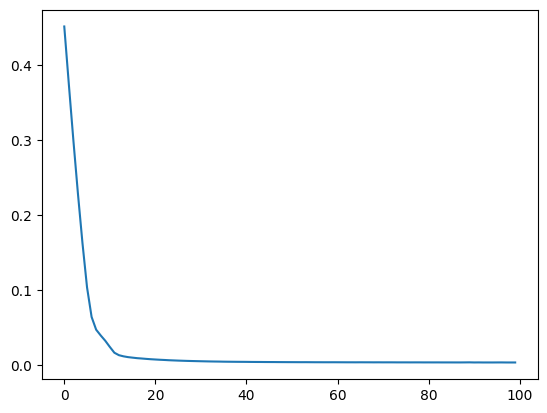

In [115]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.plot(history.histroy['val_loss'])

AttributeError: 'History' object has no attribute 'histroy'

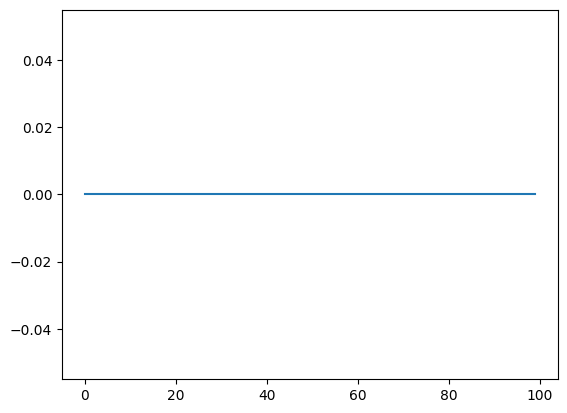

In [116]:
plt.plot(history.history['accuracy'])
plt.plot(history.histroy['val_accuracy'])